In [1]:
''''
1. Which highway has the overall heaviest auto traffic volume per day
	- Direction
	- Across regions
	- Across stations 
2. Which highway has the overall heaviest auto traffic volume per week
	- Direction
	- Across regions
	- Across stations 
3. Which highway has the overall heaviest truck traffic volume per day
	- Direction
	- Across regions
	- Across stations 
4. Which highway has the overall heaviest truck traffic volume per week
	- Direction
	- Across regions
	- Across stations 
5. Which day of week has the highest truck traffic volume
	- Direction
	- Across regions
	- Across stations 
6. Which day of week has the highest auto traffic volume
	- Direction
	- Across regions
	- Across stations 
7. Which hour of day has the highest truck traffic volume
	- Direction
	- Across regions
	- Across stations 
8. Which hour of day has the highest auto traffic volume
	- Direction
	- Across regions
	- Across stations 	
7. Which direction (across regions + across highways) and which hour has highest traffic
8. Which direction and which hour has highest truck traffic
9. Which direction and which hour has highest auto traffic
10. Which is the busiest MTO region (cars + trucks)
11. 

hourly
	- auto
	- truck
	- single truck
	- multi truck
	- totally
daily
	- auto
	- truck
	- single truck
	- multi truck
	- totally
weekly
	- auto
	- truck
	- single truck
	- multi truck
	- totally
totally
	- auto
	- truck
	- single truck
	- multi truck
stationly
	- hourly
		- auto
		- truck
		- single truck
		- multi truck
		- total veh
		- directionally
	- daily
		- auto
		- truck
		- single truck
		- multi truck	
		- total veh
		- directionally		
	- weekly
		- auto
		- truck
		- single truck
		- multi truck	
		- total veh
		- directionally
regionly
	- hourly
		- auto
		- truck
		- single truck
		- multi truck
		- total veh
		- directionally
	- daily
		- auto
		- truck
		- single truck
		- multi truck	
		- total veh
		- directionally		
	- weekly
		- auto
		- truck
		- single truck
		- multi truck	
		- total veh
		- directionally
directionly
	- hourly
		- auto
		- truck
		- single truck
		- multi truck
		- total veh
	- daily
		- auto
		- truck
		- single truck
		- multi truck	
		- total veh
	- weekly
		- auto
		- truck
		- single truck
		- multi truck	
		- total veh
'''''

"'\n1. Which highway has the overall heaviest auto traffic volume per day\n\t- Direction\n\t- Across regions\n\t- Across stations \n2. Which highway has the overall heaviest auto traffic volume per week\n\t- Direction\n\t- Across regions\n\t- Across stations \n3. Which highway has the overall heaviest truck traffic volume per day\n\t- Direction\n\t- Across regions\n\t- Across stations \n4. Which highway has the overall heaviest truck traffic volume per week\n\t- Direction\n\t- Across regions\n\t- Across stations \n5. Which day of week has the highest truck traffic volume\n\t- Direction\n\t- Across regions\n\t- Across stations \n6. Which day of week has the highest auto traffic volume\n\t- Direction\n\t- Across regions\n\t- Across stations \n7. Which hour of day has the highest truck traffic volume\n\t- Direction\n\t- Across regions\n\t- Across stations \n8. Which hour of day has the highest auto traffic volume\n\t- Direction\n\t- Across regions\n\t- Across stations \t\n7. Which directi

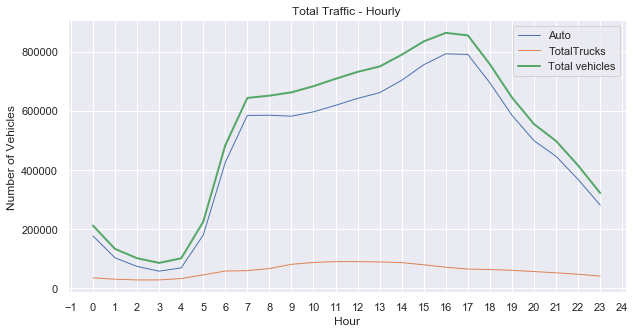

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

tick_spacing = 1
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

commercialDf = pd.read_csv('2006_commercial_vehicle_survey.csv')
bins = np.arange(-1,commercialDf['Hour'].max()+1,1)
commercialDf['hourBin'] = pd.cut(commercialDf['Hour'],bins)

#  [HOURLY] Total autos
hourlyDF = commercialDf.groupby(['hourBin'],as_index=False)[['Auto']].sum()
hourlyDF.drop('hourBin',1,inplace=True)
hourlyDF.plot(kind='line',y='Auto',linestyle='-',linewidth=1,ax=ax1,grid=True)

# #  [HOURLY] Single Truck
# hourlyDF = commercialDf.groupby(['hourBin'],as_index=False)[['Single']].sum()
# hourlyDF.drop('hourBin',1,inplace=True)
# hourlyDF.plot(kind='line',y='Single',linestyle='-',linewidth=1,ax=ax1,grid=True)

# #  [HOURLY] Multi Trucks
# hourlyDF = commercialDf.groupby(['hourBin'],as_index=False)[['Multi']].sum()
# hourlyDF.drop('hourBin',1,inplace=True)
# hourlyDF.plot(kind='line',y='Multi',linestyle='-',linewidth=1,ax=ax1,grid=True)

#  [HOURLY] Total trucks
commercialDf['TotalTrucks'] = commercialDf['Single'] + commercialDf['Multi'] 
hourlyDF = commercialDf.groupby(['hourBin'],as_index=False)[['TotalTrucks']].sum()
hourlyDF.drop('hourBin',1,inplace=True)
hourlyDF.plot(kind='line',y='TotalTrucks',linestyle='-',linewidth=1,ax=ax1,grid=True)

#  [HOURLY] Total Vehicles
hourlyDF = commercialDf.groupby(['hourBin'],as_index=False)[['Total vehicles']].sum()
hourlyDF.drop('hourBin',1,inplace=True)
hourlyDF.plot(kind='line',y='Total vehicles',linestyle='-',linewidth=2,ax=ax1,grid=True)

plt.title('Total Traffic - Hourly')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')
plt.show()

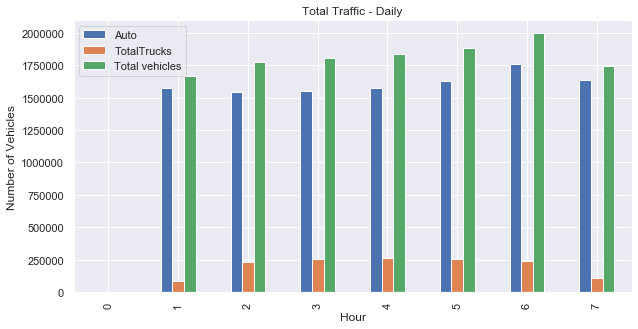

In [8]:
fig2, ax2 = plt.subplots(figsize=(10, 5))

bins = np.arange(-1,commercialDf['Day of Week Number'].max()+1,1)
commercialDf['dayBin'] = pd.cut(commercialDf['Day of Week Number'],bins)

#  [DAILY] Total autos
dailyDF = commercialDf.groupby(['dayBin'],as_index=False)[['Auto']].sum()
dailyDF.drop('dayBin',1,inplace=True)

#  [DAILY] Total trucks
commercialDf['TotalTrucks'] = commercialDf['Single'] + commercialDf['Multi'] 
dailyDF['TotalTrucks'] = commercialDf.groupby(['dayBin'],as_index=False)[['TotalTrucks']].sum()['TotalTrucks']
dailyDF['Total vehicles'] = commercialDf.groupby(['dayBin'],as_index=False)[['Total vehicles']].sum()['Total vehicles']
dailyDF.plot(kind='bar',ax=ax2,grid=True)
plt.title('Total Traffic - Daily')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')
plt.show()

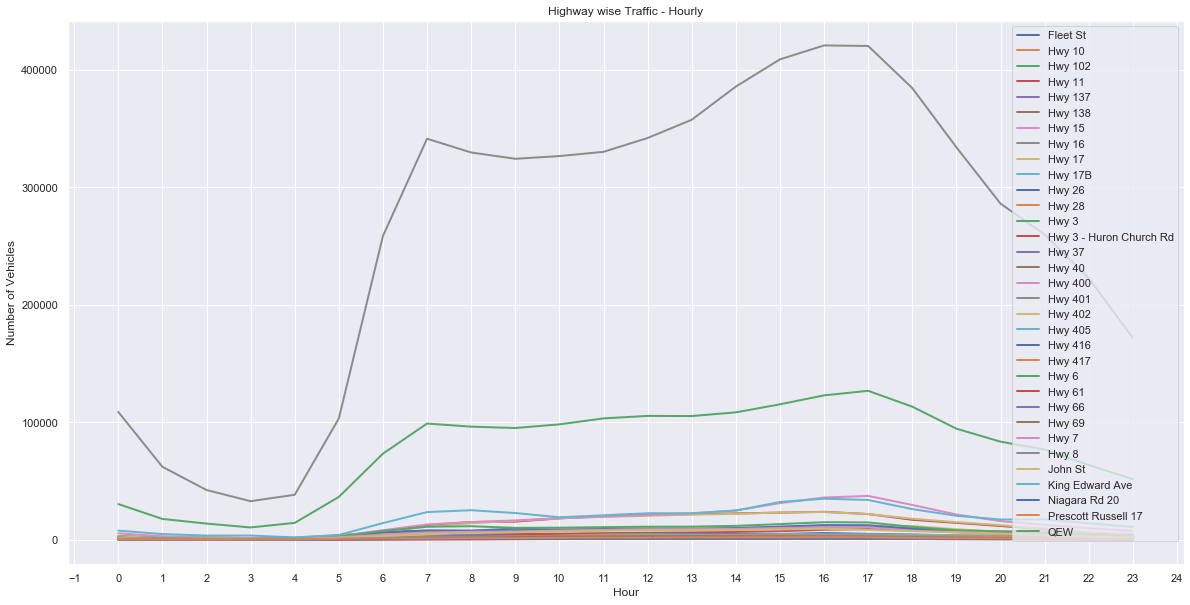

In [16]:
import matplotlib.ticker as ticker
fig3, ax3 = plt.subplots(figsize=(20, 10))

tick_spacing = 1
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax3.yaxis.set_major_locator(ticker.MultipleLocator(10000))

roadWiseDf = commercialDf.groupby(
    ['Highway or Road','Hour'],as_index=False)[['Single','Multi','Auto','total_trucks']].sum()
highways = roadWiseDf['Highway or Road'].unique()
for highway in highways:
    roadWiseDf[(roadWiseDf['Highway or Road'] == highway)].plot(kind='line',
                        x='Hour',y='Auto',linestyle='-',linewidth=2,ax=ax3,grid=True,label=highway)

plt.title('Highway wise Traffic - Hourly')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')

plt.show()

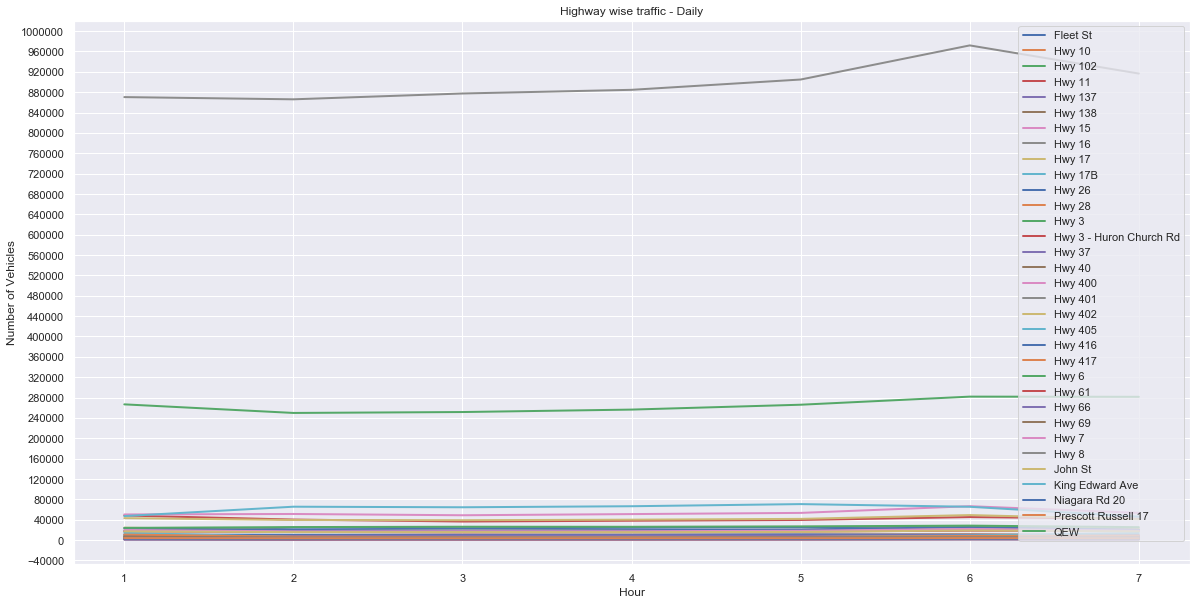

In [17]:
import matplotlib.ticker as ticker
fig3, ax3 = plt.subplots(figsize=(20, 10))

tick_spacing = 1
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax3.yaxis.set_major_locator(ticker.MultipleLocator(40000))

roadWiseWeekDayDf = commercialDf.groupby(
    ['Highway or Road','Day of Week Number'],as_index=False)[['Single','Multi','Auto','total_trucks']].sum()
highways = roadWiseWeekDayDf['Highway or Road'].unique()
for highway in highways:
    roadWiseWeekDayDf[(roadWiseWeekDayDf['Highway or Road'] == highway)].plot(kind='line',
                        x='Day of Week Number',y='Auto',linestyle='-',linewidth=2,ax=ax3,grid=True,label=highway)

plt.title('Highway wise traffic - Daily')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')
plt.show()

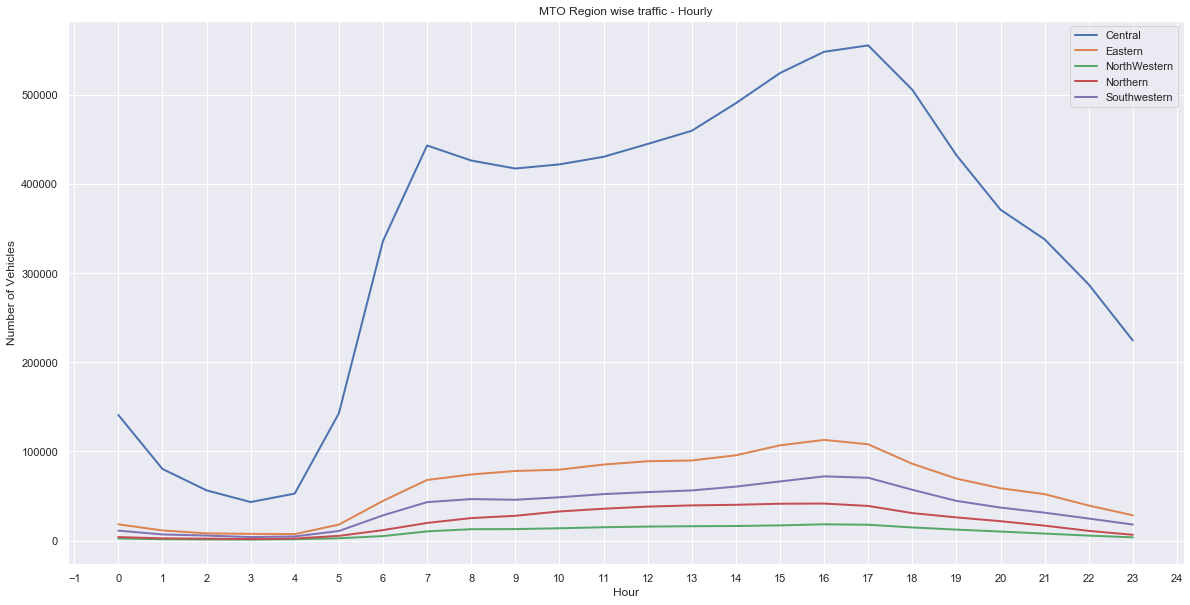

In [18]:
import matplotlib.ticker as ticker
fig3, ax3 = plt.subplots(figsize=(20, 10))

tick_spacing = 1
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax3.yaxis.set_major_locator(ticker.MultipleLocator(40000))

regionWiseHourlyDf = commercialDf.groupby(
    ['MTO Region','Hour'],as_index=False)[['Single','Multi','Auto','total_trucks']].sum()
regions = regionWiseHourlyDf['MTO Region'].unique()
for region in regions:
    regionWiseHourlyDf[(regionWiseHourlyDf['MTO Region'] == region)].plot(kind='line',
                        x='Hour',y='Auto',linestyle='-',linewidth=2,ax=ax3,grid=True,label=region)

plt.title('MTO Region wise traffic - Hourly')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')

plt.show()

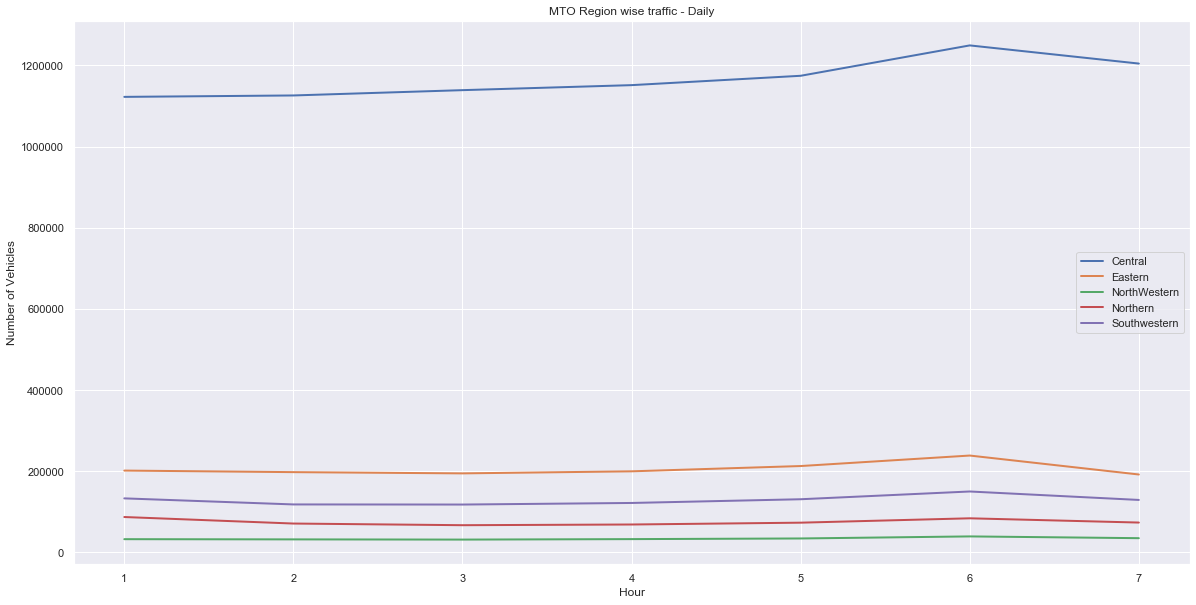

In [19]:
import matplotlib.ticker as ticker
fig3, ax3 = plt.subplots(figsize=(20, 10))

tick_spacing = 1
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax3.yaxis.set_major_locator(ticker.MultipleLocator(40000))

regionWiseDailyDf = commercialDf.groupby(
    ['MTO Region','Day of Week Number'],as_index=False)[['Single','Multi','Auto','total_trucks']].sum()
regions = regionWiseDailyDf['MTO Region'].unique()
for region in regions:
    regionWiseDailyDf[(regionWiseDailyDf['MTO Region'] == region)].plot(kind='line',
                        x='Day of Week Number',y='Auto',linestyle='-',linewidth=2,ax=ax3,grid=True,label=region)
plt.title('MTO Region wise traffic - Daily')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')
plt.show()

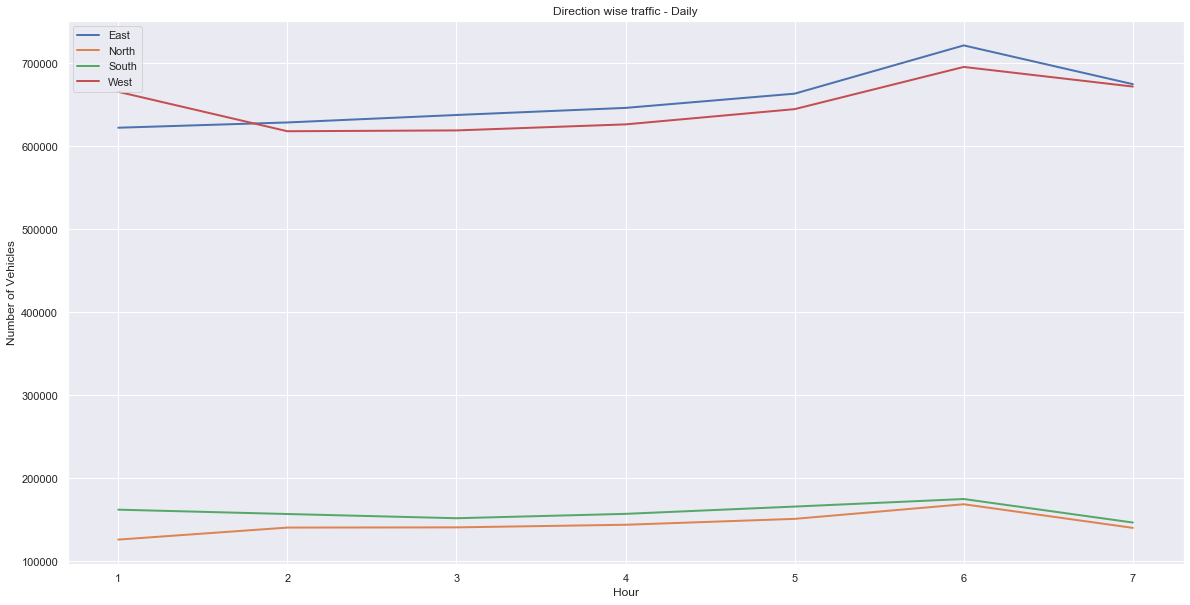

In [20]:
import matplotlib.ticker as ticker
fig3, ax3 = plt.subplots(figsize=(20, 10))

tick_spacing = 1
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax3.yaxis.set_major_locator(ticker.MultipleLocator(40000))

directionWiseDailyDf = commercialDf.groupby(
    ['Direction','Day of Week Number'],as_index=False)[['Single','Multi','Auto','total_trucks']].sum()
directionWiseDailyDf

directions = directionWiseDailyDf['Direction'].unique()
for direction in directions:
    directionWiseDailyDf[(directionWiseDailyDf['Direction'] == direction)].plot(kind='line',
                        x='Day of Week Number',y='Auto',linestyle='-',linewidth=2,ax=ax3,grid=True,label=direction)


plt.title('Direction wise traffic - Daily')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')
plt.show()

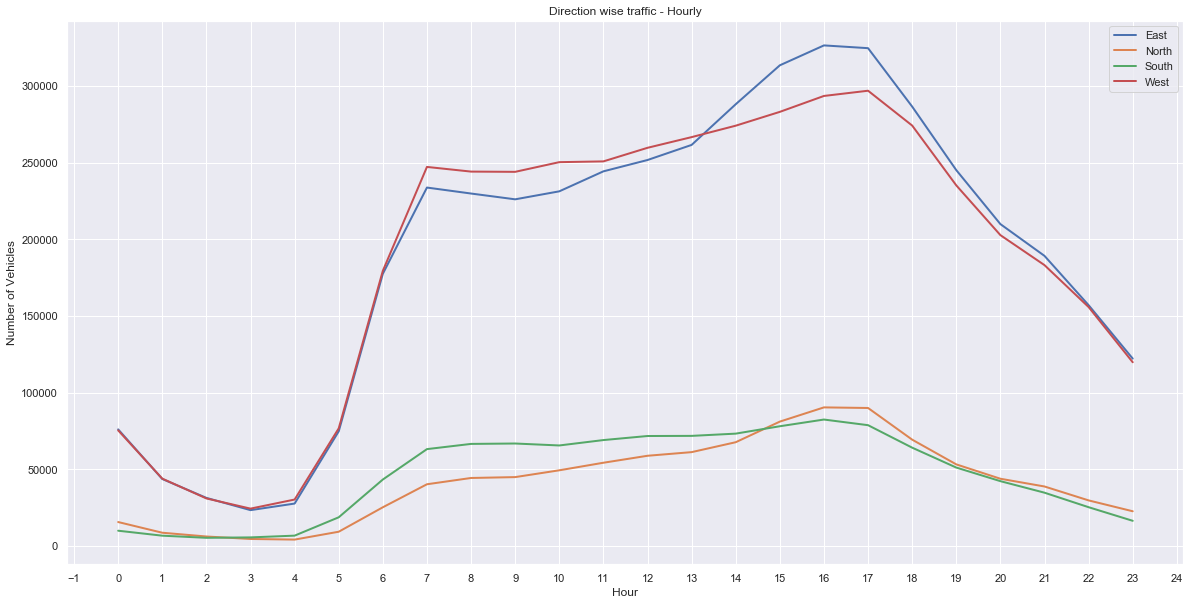

In [21]:
import matplotlib.ticker as ticker
fig3, ax3 = plt.subplots(figsize=(20, 10))

tick_spacing = 1
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax3.yaxis.set_major_locator(ticker.MultipleLocator(40000))

directionWiseHourlyDf = commercialDf.groupby(
    ['Direction','Hour'],as_index=False)[['Single','Multi','Auto','total_trucks']].sum()
directions = directionWiseHourlyDf['Direction'].unique()
for direction in directions:
    directionWiseHourlyDf[(directionWiseHourlyDf['Direction'] == direction)].plot(kind='line',
                        x='Hour',y='Auto',linestyle='-',linewidth=2,ax=ax3,grid=True,label=direction)

plt.title('Direction wise traffic - Hourly')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')
plt.show()